       current_liquidation_threshold  available_borrows_eth  total_debt_eth  \
78                          0.850000               6.356027        7.225871   
79                          0.850000              10.138813        9.516538   
80                          0.850000              10.832971        8.222870   
81                          0.853618               0.000057        0.000000   
82                          0.853627               0.000057        0.000000   
...                              ...                    ...             ...   
99995                       0.825000             247.500498      441.576216   
99996                       0.825000             269.004767      460.547472   
99997                       0.825000             222.239657      507.318884   
99998                       0.825000             278.925484      450.639284   
99999                       0.825000             357.491080      372.079048   

       sum_total_collateral_eth_x_LT  total_collate

,current_liquidation_threshold,available_borrows_eth,total_debt_eth,sum_total_collateral_eth_x_LT,total_collateral_eth,HF
count,50868.000000,50868.000000,50868.000000,50868.000000,50868.000000,50868.000000
mean,0.793531,72.577167,68.915847,141.479495,177.895332,0.935657
std,0.071248,532.102483,577.806829,965.133178,1181.362637,0.245365
min,0.167422,0.000000,0.000000,0.000000,0.000001,0.000000
25%,0.750000,0.017492,0.000927,0.062655,0.076923,1.000000
50%,0.810000,1.223445,0.731229,2.752002,3.539450,1.000000
75%,0.850000,11.289232,9.447314,24.866960,31.364019,1.000000
max,0.880000,17387.384332,43676.228705,44238.615100,52045.429529,1.000000


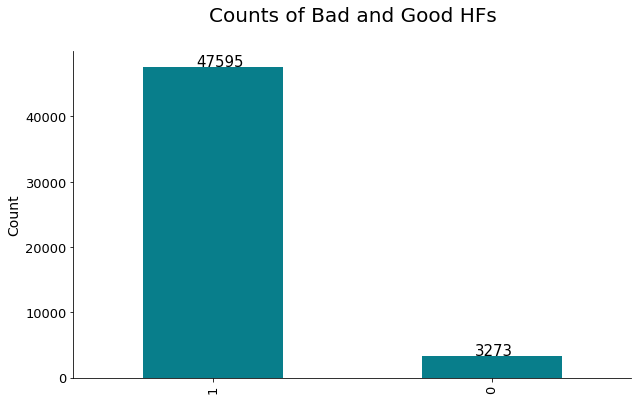

In [22]:
# Load in our libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
from timeit import timeit

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline

#import file
# data set from - https://github.com/credprotocol/Aave-V2-Health-Factor-Dataset
df = pd.read_csv(r'/Users/Henri/Desktop/loputoo/Untitled Folder/aave-v2.csv')



df['HF'] = [ 1 if HF >= 1 else 0 for HF in df['HF']]


# needed columns from dataset
df = df[['current_liquidation_threshold', 'available_borrows_eth', 'total_debt_eth', 'sum_total_collateral_eth_x_LT', 'total_collateral_eth', 'HF']].head(100000)

#remove rows where total collateral_eth = 0 
df = df[df.total_collateral_eth != 0]
#print(test.describe())

#count and visualize the good and bad H
ax = df['HF'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Counts of Bad and Good HFs', size=20, pad=30)
ax.set_ylabel('Count', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 100, str(round(i.get_height(), 2)), fontsize=15)
    
print(df)
df.describe()

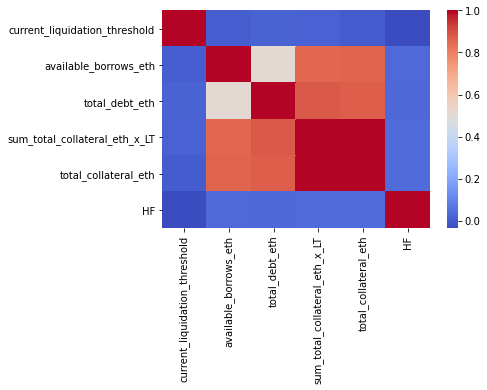

In [4]:
# Correlation matrix
g = sns.heatmap(df.corr(),annot=False, fmt = ".2f", cmap = "coolwarm")

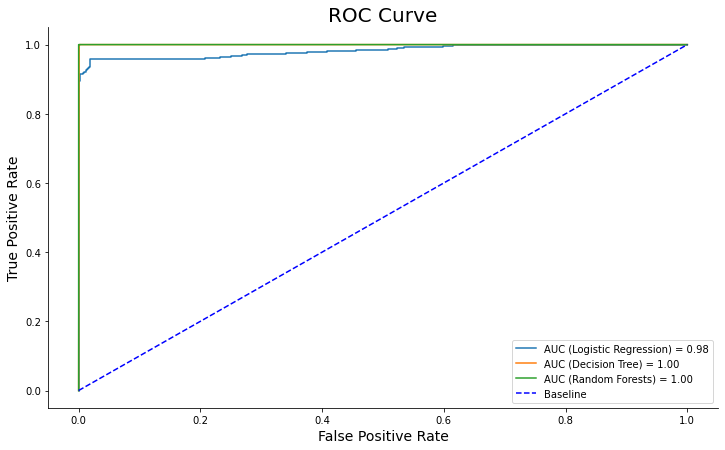

In [12]:
#normalize the dataset mõelda kuidas ja mis moodi mõistlik normaliseerida
#normalize_data = test.loc[ : , test.columns !='HF']

#print(scaled_df)

from sklearn.model_selection import train_test_split

X = df.drop('HF', axis=1)
y = df['HF']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=42
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


model_lr = LogisticRegression().fit(X_train, y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1]

model_dt = DecisionTreeClassifier().fit(X_train, y_train)
probs_dt = model_dt.predict_proba(X_test)[:, 1]

model_rf = RandomForestClassifier().fit(X_train, y_train)
probs_rf = model_rf.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score, roc_curve

#y_test_int = y_test.replace({'Good': 1, 'Bad': 0})
#auc_lr = roc_auc_score(y_test, probs_lr)
#fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr)

#auc_dt = roc_auc_score(y_test, probs_dt)
#fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, probs_dt)

#auc_rf = roc_auc_score(y_test, probs_rf)
#fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, probs_rf)


plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

In [15]:
#from https://www.kaggle.com/code/kaanvural/credit-score-classification-5-models-84-f1 block 105
import scipy.stats as ss
# Check for skewness to decide which scaling method to use. Normalize for skewed data, Standardize for normal distributed data
cols_to_standardize = [] 
cols_to_normalize = []

for col in df.drop('HF', axis=1).columns:
    skewness = ss.skew(df[col], axis=0, bias=True)
    print(f"column: {col}, skewness: {skewness}")

    if skewness > 1 or skewness < -1:
        cols_to_normalize.append(col)
    else:
        cols_to_standardize.append(col)

column: current_liquidation_threshold, skewness: -1.6739793411246422
column: available_borrows_eth, skewness: 17.376941493760143
column: total_debt_eth, skewness: 24.60816320376078
column: sum_total_collateral_eth_x_LT, skewness: 15.554951061705745
column: total_collateral_eth, skewness: 14.75266593142476


In [16]:
print(cols_to_normalize)

['current_liquidation_threshold', 'available_borrows_eth', 'total_debt_eth', 'sum_total_collateral_eth_x_LT', 'total_collateral_eth']
[]


In [17]:
#model development
np.sum(pd.isna(df).sum()) # last check for any missing

0

In [20]:
def show_metrics(model_name, y_pred, y_test,  best_params=None):
    """
    show metrics for less usage of code
    """
    print(f"Model: {model_name}")
    if best_params != None:    
        print(f"Best Parameters: {best_params}")
    
    print(classification_report(y_test, y_pred, target_names=['0', '1', '2']))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.show()
    print("-" * 75)

In [21]:
# train with logistic regression
X = df.drop(['HF'], axis=1)
y = df['HF']
y = y.replace({'BAD':0, 'Good':1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.225, random_state=42, stratify=y)

models_df = pd.DataFrame(columns=['model name', 'f1 score', 'accuracy', 'roc_auc'])

MODELS = {
    'LR': LogisticRegression(max_iter=1000), 
    'KNN': KNeighborsClassifier(), 
    'DT': DecisionTreeClassifier(), 
    'RF': RandomForestClassifier(), 
    'XGB': XGBClassifier(objective='multi:softmax'),
    'ADAB': AdaBoostClassifier(),
}

param_grid = {
    'LR': {'LR__C': [0.01, 0.1, 1, 5, 10], 
           'LR__class_weight': [None, 'balanced']},

    'KNN': {'KNN__n_neighbors': range(5, 30, 2)},

    'DT': {'DT__max_depth': range(5, 14, 2), 
           'DT__criterion': ['gini', 'entropy']},

    'RF': {'RF__max_depth': range(5, 14, 2),
           'RF__n_estimators': [50, 100, 200],
           'RF__criterion': ['gini', 'entropy']},

    'XGB': {'XGB__max_depth': range(3, 12, 2), 
            'XGB__learning_rate': [0.01, 0.05, 0.15, 0.3], 
            'XGB__n_estimators': [50, 100, 200]},

    'ADAB': {'ADAB__n_estimators': [50, 100, 200], 
             'ADAB__learning_rate': [0.01, 0.5, 1, 3],},
}

# column transformer to use both scaling methods for different columns
ct = ColumnTransformer([
    ('scale', MinMaxScaler(), cols_to_normalize),
    ('standardize', StandardScaler(), cols_to_standardize)
])

#skf = StratifiedKFold(n_splits=4) # validation for ensure that the model is not giving good results only for one split

for i, (name, model) in enumerate(MODELS.items()):

    pipe = Pipeline([
        ('ct', ct), # Step 1: Standardize or Normalize the data
        ('pca', PCA(n_components='mle')), # Step 2: Apply PCA for dimensionality reduction
        (name, model) # Step 3: Run the model
    ])

    params = param_grid[name]
    
    search = GridSearchCV(pipe, params, cv=3, n_jobs=2, scoring='f1_weighted', verbose=1)
    search.fit(X, y)
   
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test) 

    pred_prob = best_model.predict_proba(X_test)

    show_metrics(name, y_pred, y_test, search.best_params_)
    models_df.loc[i] = [name, f1_score(y_test, y_pred, average='weighted'), accuracy_score(y_test, y_pred), roc_auc_score(y_test, pred_prob, multi_class='ovr')]

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'